In [ ]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


from src.EDAFunction import read_reviews, read_books
from src.clean_data import clean_reviews, clean_books
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

pd.options.display.float_format = '{:,}'.format
# pd.set_option('display.max_colwidth', -1)

### Load reviews dataset

In [3]:
reviews_df = read_reviews(os.path.join('data/', 'goodreads_reviews_mystery_thriller_crime.json.gz'))

counting file: data/goodreads_reviews_mystery_thriller_crime.json.gz
current line: 0,1000000,complete
done!


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849236 entries, 0 to 1849235
Data columns (total 8 columns):
review_id      object
user_id        object
book_id        object
rating         int64
review_text    object
timestamp      object
n_votes        int64
n_comments     int64
dtypes: int64(3), object(5)
memory usage: 112.9+ MB


In [5]:
num_reviews = len(reviews_df)
num_reviews

1849236

In [6]:
reviews_df.head()

,review_id,user_id,book_id,rating,review_text,timestamp,n_votes,n_comments
0,5e212a62bced17b4dbe41150e5bb9037,8842281e1d1347389f2ab93d60773d4d,6392944,3,I haven't read a fun mystery book in a while a...,Mon Jul 24 02:48:17 -0700 2017,6,0
1,2ede853b14dc4583f96cf5d120af636f,8842281e1d1347389f2ab93d60773d4d,28684704,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,22,0
2,8e4d61801907e591018bdc3442a9cf2b,8842281e1d1347389f2ab93d60773d4d,32283133,0,http://www.telegraph.co.uk/culture/10...,Tue Nov 01 11:09:18 -0700 2016,9,0
3,022bb6daffa49adc27f6b20b6ebeb37d,8842281e1d1347389f2ab93d60773d4d,17860739,4,An amazing and unique creation: JJ Abrams and ...,Wed Mar 26 13:51:30 -0700 2014,7,0
4,0e317947e1fd341f573192111bb2921d,8842281e1d1347389f2ab93d60773d4d,8694005,3,The Name of the Rose is a thrilling Dan Brown-...,Wed Sep 08 01:22:27 -0700 2010,17,6


In [7]:
reviews_df.isnull().sum()

review_id      0
user_id        0
book_id        0
rating         0
review_text    0
timestamp      0
n_votes        0
n_comments     0
dtype: int64

In [9]:
reviews_df.rating.unique()

array([3, 0, 4, 5, 2, 1])

In [10]:
#We noticed there are reviews with a rate of zero.
#In Goodreads, the rating is from 1 to 5, so zero means missing value.
#We are going to delete those reviews considering the amount is small (3%)

reviews_df.rating[reviews_df.rating == 0].count()/num_reviews

0.03121126778842722

In [11]:
reviews_df1 = reviews_df[reviews_df.rating != 0]

In [28]:
reviews_df1.describe()

,rating,n_votes,n_comments
count,"1,791,519.0","1,791,519.0","1,791,519.0"
mean,3.802666898871851,1.105045494912418,0.27077859626384093
std,1.0281259804676335,6.3391224896565035,2.051866561544186
min,1.0,-3.0,-1.0
25%,3.0,0.0,0.0
50%,4.0,0.0,0.0
75%,5.0,1.0,0.0
max,5.0,904.0,348.0


In [ ]:
len(reviews_df1.user_id.unique()), len(reviews_df1.book_id.unique())

[autoreload of IPython.core.application failed: Traceback (most recent call last):
  File "/Users/elainewu/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/elainewu/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    before executing the Python code typed.
  File "/Users/elainewu/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    module.__dict__.clear()
  File "/Users/elainewu/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
  File "/Users/elainewu/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = new
  File "/Users/elainewu/anaconda3/lib/python3.7/inspect.py", line 1513, in stack
    return getouterframes(sys._getframe(1), context)
  File "/Users/elainewu/anaco

[autoreload of prompt_toolkit.clipboard.base failed: Traceback (most recent call last):
  File "/Users/elainewu/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/elainewu/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    before executing the Python code typed.
  File "/Users/elainewu/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    module.__dict__.clear()
  File "/Users/elainewu/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
  File "/Users/elainewu/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = new
  File "/Users/elainewu/anaconda3/lib/python3.7/inspect.py", line 1513, in stack
    return getouterframes(sys._getframe(1), context)
  File "/Users/elainewu/

### rating distribution

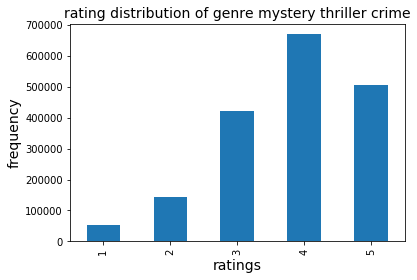

In [39]:
# rating distribution
reviews_df1.groupby('rating').size().plot(kind='bar')
plt.title('rating distribution of genre mystery thriller crime', fontsize=14)
plt.xlabel('ratings', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.savefig('genre_crime_rating_dist.png');

### n_votes

In [45]:
pct = reviews_df1[reviews_df1.n_votes > 0].groupby('n_votes').size().sum()/len(reviews_df1[reviews_df1.n_votes >= 0])
print('%.3f of reviews received votes'%pct)

0.258 of reviews received votes


In [49]:
print('the max number of votes a review received is %d'%reviews_df1.n_votes.max())

the max number of votes a review received is 904


In [60]:
reviews_df1[reviews_df1.n_votes == reviews_df1.n_votes.max()].review_text

1554538    Wow. \n Just wow. \n Is Tarryn a psychic because this book is a mirror image of my life. Word for word, I kept thinking, "Did I write this book?" \n When I got about halfway through, it finally hit me. I DID write it. That's why I'm giving it five stars. Because I wrote it. \n Not Tarryn. \n Bad Mommy? More like bad friend.
Name: review_text, dtype: object

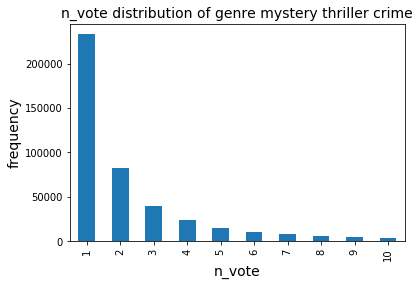

In [46]:
len(reviews_df1.n_votes.unique())
len(reviews_df1[reviews_df1.n_votes >= 0])
reviews_df1[reviews_df1.n_votes >= 0].groupby('n_votes').size()[1:11].plot(kind='bar')
plt.title('n_vote distribution of genre mystery thriller crime', fontsize=14)
plt.xlabel('n_vote', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.savefig('genre_crime_n_vote_dist.png');

### n_comments

In [50]:
pct = reviews_df1[reviews_df1.n_comments > 0].groupby('n_votes').size().sum()/len(reviews_df1[reviews_df1.n_comments >= 0])
print('%.3f of reviews received comments'%pct)

0.075 of reviews received comments


In [52]:
print('the max number of votes a review received is %d'%reviews_df1.n_comments.max())

the max number of votes a review received is 348


In [61]:
reviews_df1[reviews_df1.n_comments == reviews_df1.n_comments.max()].review_text

1640745    This was so much fun to read as a buddy read with my Goodreads friend, Laura. She kindly waited for my library copy to arrive and then was very patient with my reading pace; we stayed practically in sync the entire way through the book, and that made the experience really fun. \n I love J.K. Rowling, as a writer and a storyteller, and as a person, and I'll most likely read any book she writes. \n I do prefer cozy and/or humorous mysteries. This one had too much gore for me, though thankfully the violence was off the page. There was way too much sexual perversion for me too, most notably in the pages of a fictional book within the book, a book I found repulsive. Though the reader is supposed to feel this way, I still didn't enjoy reading excerpts. I have to say that Rowling knows her mythology though, just as she showed in the Harry Potter books. \n I do love the character Robin and I hope she appears more and more frequently with each new book in the series. My favorite part

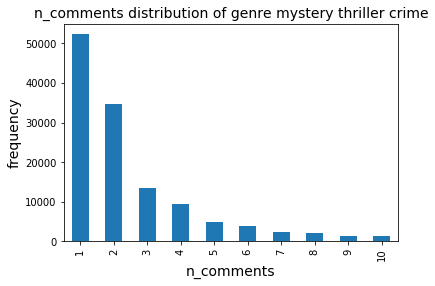

In [53]:
reviews_df1[reviews_df1.n_comments >= 0].groupby('n_comments').size()[1:11].plot(kind='bar')
plt.title('n_comments distribution of genre mystery thriller crime', fontsize=14)
plt.xlabel('n_comments', fontsize=14)
plt.ylabel('frequency', fontsize=14)
# plt.ylim(0, 200000)
plt.savefig('genre_crime_n_comments_dist.png');

### Load books dataset

In [4]:
books_df = read_books(os.path.join('data/', 'goodreads_books_mystery_thriller_crime.json.gz'), head=False)

counting file: data/goodreads_books_mystery_thriller_crime.json.gz
current line: 0,complete
done!


In [63]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219235 entries, 0 to 219234
Data columns (total 19 columns):
book_id               219235 non-null object
work_id               219235 non-null object
isbn                  219235 non-null object
asin                  219235 non-null object
title                 219235 non-null object
description           219235 non-null object
num_pages             219235 non-null object
is_ebook              219235 non-null object
link                  219235 non-null object
country_code          219235 non-null object
language_code         219235 non-null object
average_rating        219235 non-null object
ratings_count         219235 non-null object
text_reviews_count    219235 non-null object
author_id             219235 non-null object
publisher             219235 non-null object
publication_year      219235 non-null object
genre                 219235 non-null object
similar_books         219235 non-null object
dtypes: object(19)
memory usage: 3

In [64]:
num_books = len(books_df)
num_books

219235

In [5]:
books_df1 = books_df.copy()

### fill in missing page num with zero

In [164]:
books_df1.num_pages = books_df1.num_pages.replace(r'^\s*$', 0, regex=True)

In [165]:
len(books_df1.num_pages.unique())

1158

### concat genre

In [10]:
books_df1.genre[:1].values

array([list([{'count': '159', 'name': 'to-read'}, {'count': '12', 'name': 'historical-fiction'}, {'count': '11', 'name': 'mystery'}, {'count': '10', 'name': 'historical-mystery'}, {'count': '7', 'name': 'medieval'}, {'count': '6', 'name': 'historical'}, {'count': '5', 'name': 'crime'}, {'count': '3', 'name': 'series'}, {'count': '3', 'name': 'ebook'}, {'count': '3', 'name': 'fiction'}, {'count': '3', 'name': 'crowner-john'}, {'count': '2', 'name': 'default'}, {'count': '2', 'name': 'books'}, {'count': '2', 'name': 'owned'}, {'count': '2', 'name': 'mystery-thrillers'}, {'count': '2', 'name': 'c'}, {'count': '2', 'name': 'library'}, {'count': '2', 'name': 'wish-list'}, {'count': '2', 'name': 'england'}, {'count': '2', 'name': 'medieval-england'}, {'count': '2', 'name': 'mystery-historical'}, {'count': '2', 'name': 'audiobook'}, {'count': '1', 'name': 'recs-not-interested'}, {'count': '1', 'name': 'available'}, {'count': '1', 'name': 'public-library'}, {'count': '1', 'name': 'boulder'}, {

In [8]:
def genre_list(x):
    genre = ''
    try:
        for i in x:
            if int(i['count']) >= 1:
                genre += i['name'] +' '
        return genre
    except:
        return 'mystery thriller crime'

In [10]:
books_df1.genre = books_df1.genre.apply(lambda x: genre_list(x))

In [11]:
books_df1.genre[:10]

0    to-read historical-fiction mystery historical-...
1    currently-reading netgalley kindle read-2017 r...
2    to-read currently-reading humor kindle on-my-k...
3    to-read mystery england mysteries currently-re...
4    to-read historical-fiction currently-reading m...
5    mystery to-read fiction crime mysteries classi...
6    to-read currently-reading kindle indie-barely-...
7    to-read mystery crime fiction mysteries curren...
8    to-read currently-reading crime a-novel to-rea...
9    mystery crime mysteries classics owned favorit...
Name: genre, dtype: object

In [12]:
genre_len = books_df1.genre.apply(lambda x: len(x))

In [17]:
genre_len.describe()

count            219,235.0
mean     959.6314821994663
std     394.67689452970086
min                    8.0
25%                  665.0
50%                1,128.0
75%                1,234.0
max                2,141.0
Name: genre, dtype: float64

In [14]:
count = CountVectorizer()
count_matrix = count.fit_transform(books_df1.genre)
genre_df = pd.DataFrame(count_matrix.todense(), index=books_df.book_id)
# sc = StandardScaler()
# scaled_count_matrix = sc.fit_transform(count_matrix.todense())
# genre_df = pd.DataFrame(scaled_count_matrix, index=books_df.book_id)

# final_df = pd.concat([genre_df,books_df1],axis=1)
    

In [16]:
genre_df.shape

(219235, 87531)

### extract the first author id

In [193]:
author = books_df1.author_id.apply(lambda x: len(x))

In [208]:
(author>1).sum(),  (author>2).sum(), (author>3).sum()

(44710, 7065, 2113)

In [210]:
books_df1.author_id = books_df1.author_id.apply(lambda x:x[0]['author_id'])

In [213]:
len(books_df1.author_id.unique())

31761

In [214]:
mask = author>1
books_df1.author_id[mask][:5]

2     15104629
4     337108  
5     123715  
9     123715  
10    12577   
Name: author_id, dtype: object

In [204]:
books_df1.author_id.loc[0]

[{'author_id': '37778', 'role': ''}]

In [196]:
books_df1.author_id.loc[34606]

[{'author_id': '12471', 'role': 'Editor, Foreword'},
 {'author_id': '2764415', 'role': 'Introduction'},
 {'author_id': '360012', 'role': 'Contributor'},
 {'author_id': '5447042', 'role': 'Contributor'},
 {'author_id': '6917532', 'role': 'Contributor'},
 {'author_id': '76147', 'role': 'Contributor'},
 {'author_id': '6917533', 'role': 'Contributor'},
 {'author_id': '299647', 'role': 'Contributor'},
 {'author_id': '274588', 'role': 'Contributor'},
 {'author_id': '680083', 'role': 'Contributor'},
 {'author_id': '1148756', 'role': 'Contributor'},
 {'author_id': '7792', 'role': 'Contributor'},
 {'author_id': '78761', 'role': 'Contributor'},
 {'author_id': '4334618', 'role': 'Contributor'},
 {'author_id': '6917535', 'role': 'Contributor'},
 {'author_id': '2315172', 'role': 'Contributor'},
 {'author_id': '4373667', 'role': 'Contributor'},
 {'author_id': '2849194', 'role': 'Contributor'},
 {'author_id': '214371', 'role': 'Contributor'},
 {'author_id': '264244', 'role': 'Contributor'},
 {'author

In [88]:
# books_df.asin.loc[0] == '' #check and confirm the blank space is empty string
# replace all emppty string with nan
# books_df1 = books_df.replace(r'^\s*$', np.nan, regex=True)

In [89]:
books_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219235 entries, 0 to 219234
Data columns (total 19 columns):
book_id               219235 non-null object
work_id               219235 non-null object
isbn                  134718 non-null object
asin                  48436 non-null object
title                 219235 non-null object
description           198488 non-null object
num_pages             149407 non-null object
is_ebook              219235 non-null object
link                  219235 non-null object
country_code          219235 non-null object
language_code         136784 non-null object
average_rating        219235 non-null object
ratings_count         219235 non-null int64
text_reviews_count    219235 non-null object
author_id             219235 non-null object
publisher             161303 non-null object
publication_year      164741 non-null object
genre                 219235 non-null object
similar_books         219235 non-null object
dtypes: int64(1), object(18)
memory 

In [73]:
books_df1.isnull().sum()/len(books_df1)

book_id              0.0                
work_id              0.0                
isbn                 0.38550870070928456
asin                 0.7790681232467443 
title                0.0                
description          0.09463361233379707
num_pages            0.3185075375738363 
is_ebook             0.0                
link                 0.0                
country_code         0.0                
language_code        0.3760850229206103 
average_rating       0.0                
ratings_count        0.0                
text_reviews_count   0.0                
author_id            0.0                
publisher            0.26424612858348345
publication_year     0.24856432595160444
genre                0.0                
similar_books        0.0                
dtype: float64

In [148]:
len(books_df1.work_id.unique()), len(books_df1.publisher.unique()), len(books_df1.publication_year.unique())

(89869, 20678, 192)

In [90]:
# convert average_rating, ratings_count, text_reviews_count to float/integer
books_df1.average_rating =books_df1.average_rating.astype('float')
books_df1.ratings_count =books_df1.ratings_count.astype('int')
books_df1.text_reviews_count =books_df1.text_reviews_count.astype('int')

In [90]:
# In order to convert num_pages to integer, we replace nan with zero. 
# With the data type of integer, we can replace zero with mean.
books_df1.num_pages = books_df1.num_pages.fillna(0)
books_df1.num_pages =books_df1.num_pages.astype('int')
mean = round(books_df1.num_pages[books_df1.num_pages != 0].mean())
books_df1.num_pages = books_df1.num_pages.replace(0, mean)

In [91]:
books_df1.head()

,book_id,work_id,isbn,asin,title,description,num_pages,is_ebook,link,country_code,language_code,average_rating,ratings_count,text_reviews_count,author_id,publisher,publication_year,genre,similar_books
0,6066814,6243149,184737297X,NaN,"Crowner Royal (Crowner John Mystery, #13)","London, 1196. At the command of Richard the Li...",400,false,https://www.goodreads.com/book/show/6066814-cr...,US,NaN,3.93,186,15,"[{'author_id': '37778', 'role': ''}]",Simon & Schuster UK,2009,"[{'count': '159', 'name': 'to-read'}, {'count'...","[439108, 522621, 116770, 1275927, 6202655, 840..."
1,33394837,54143148,NaN,B01NCIKAQX,The House of Memory (Pluto's Snitch #2),NaN,318,true,https://www.goodreads.com/book/show/33394837-t...,US,eng,4.33,269,60,"[{'author_id': '242185', 'role': ''}]",NaN,NaN,"[{'count': '54', 'name': 'currently-reading'},...",[]
2,29074697,49305010,NaN,B01ALOWJN0,The Slaughtered Virgin of Zenopolis (Inspector...,"BATHS, BANKS AND ROMAN INSURRECTION\nDetective...",320,true,https://www.goodreads.com/book/show/29074697-t...,US,eng,3.49,192,23,"[{'author_id': '15104629', 'role': ''}, {'auth...",Amazon Digital Services,NaN,"[{'count': '90', 'name': 'to-read'}, {'count':...",[]
3,1902202,1903897,0854563903,NaN,"Dead in the Morning (Patrick Grant, #1)","Gerald breezily introduced his wife, Helen, to...",320,false,https://www.goodreads.com/book/show/1902202.De...,US,NaN,3.3,52,8,"[{'author_id': '190988', 'role': ''}]",Ulverscroft,1975,"[{'count': '51', 'name': 'to-read'}, {'count':...",[]
4,9671977,2152906,8838920931,NaN,Aristotele e i misteri di Eleusi,"""I misteri di Eleusi"" e il quinto romanzo di A...",659,false,https://www.goodreads.com/book/show/9671977-ar...,US,ita,3.54,22,3,"[{'author_id': '337108', 'role': ''}, {'author...",Sellerio,2006,"[{'count': '48', 'name': 'to-read'}, {'count':...",[]


In [146]:
books_df1.describe()

,num_pages,average_rating,ratings_count,text_reviews_count
count,"219,235.0","219,235.0","219,235.0","219,235.0"
mean,320.5208110018929,3.8315172303691902,523.902410655233,36.7153328619974
std,183.9184694418297,0.3320234420205335,"9,129.935228537253",370.8191653925541
min,1.0,0.0,0.0,0.0
25%,279.0,3.65,10.0,2.0
50%,320.0,3.85,35.0,6.0
75%,352.0,4.04,128.0,17.0
max,"52,015.0",5.0,"2,046,499.0","78,438.0"


#### Explore country and language code

These books are 100% US country code.

There are 85 languages. Except for the 37.6% missing values, 45% of books are in English, 10% are in Italy, Germany, Spanish, Dutch, French and Portuguese. (93% in total)

In [75]:
books_df1.country_code.unique()

array(['US'], dtype=object)

In [120]:
books_df1.country_code.value_counts()/len(books_df1)

US   1.0
Name: country_code, dtype: float64

In [76]:
books_df1.language_code.unique()

array([nan, 'eng', 'ita', 'en-GB', 'en-CA', 'gre', 'lit', 'fin', 'en-US',
       'per', 'bul', 'nl', 'spa', 'ger', 'swe', 'pes', 'cze', 'en', 'por',
       'fre', 'nor', 'zho', 'ind', 'rum', 'slo', 'lav', 'hun', 'afr',
       'heb', 'dan', 'pol', 'srp', 'tur', 'kat', 'jpn', 'ben', 'tha',
       'nob', 'vie', 'rus', 'ara', 'cat', 'es-MX', 'ukr', 'kan', 'scr',
       'msa', 'est', 'isl', 'pra', 'urd', 'mal', 'tam', 'glg', 'hin',
       'vls', 'din', 'pt-BR', 'slv', 'aze', 'nld', 'mkd', 'aus', 'mul',
       'eus', 'guj', 'mon', 'hye', 'fil', 'tgl', 'mus', 'abk', 'nno',
       'kor', 'frs', '--', 'mlt', 'grc', 'egy', 'jbo', 'mar', 'sin',
       'peo', 'sqi', 'bos', 'tel', 'ady'], dtype=object)

In [71]:
num_language = len(books_df1.language_code.unique())
num_language

87

In [91]:
# the percentage of each language
books_lg = books_df1[~books_df1.language_code.isnull()]
(books_lg.language_code.value_counts()/len(books_lg.language_code))[:20]

eng     0.5864282372207276  
en-US   0.08762720786056849 
en-GB   0.052213709205755056
ita     0.04042139431512458 
ger     0.03324219206924787 
spa     0.02851210667914376 
nl      0.019622178032518423
fre     0.018730260849222132
por     0.01671248099192888 
swe     0.01223827348227863 
ind     0.010929640893671775
fin     0.009650251491402504
gre     0.008297754123289274
en-CA   0.007530120481927711
cze     0.007310796584395836
pol     0.005717042928997543
tur     0.005402678675868523
ara     0.005190665574921044
dan     0.004788571762779272
bul     0.004715463796935314
Name: language_code, dtype: float64

In [80]:
import scipy.stats as stats

In [92]:
books_lg['english'] = books_lg.language_code.apply(lambda x:1 if 'en' in x else 0)

/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
en_book_rate = books_lg[books_lg['english'] == 1].average_rating.astype('int').values
nonen_book_rate = books_lg[books_lg['english'] == 0].average_rating.astype('int').values

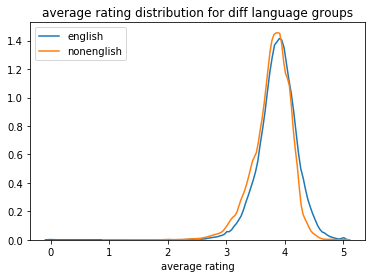

In [132]:
import seaborn as sns
sns.kdeplot(books_lg[books_lg['english'] == 1].average_rating, label='english')
sns.kdeplot(books_lg[books_lg['english'] == 0].average_rating, label='nonenglish')
plt.title('average rating distribution for diff language groups')
plt.xlabel('average rating');

In [129]:
# stats.mannwhitneyu(en_book_rate, nonen_book_rate, 'two-sided' )

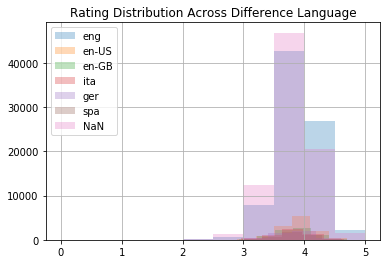

In [131]:
#Rating Distribution Across Difference Language
books_df1[books_df1.language_code == 'eng'].average_rating.hist(bins=10,label='eng', alpha =0.3)
books_df1[books_df1.language_code == 'en-US'].average_rating.hist(bins=10, label='en-US', alpha =0.3)
books_df1[books_df1.language_code == 'en-GB'].average_rating.hist(bins=10, label='en-GB', alpha =0.3)
books_df1[books_df1.language_code == 'ita'].average_rating.hist(bins=10, label='ita', alpha =0.3)
books_df1[books_df1.language_code == 'ger'].average_rating.hist(bins=10, label='ger', alpha =0.3)
books_df1[books_df1.language_code == 'spa'].average_rating.hist(bins=10, label='spa', alpha =0.3)
books_df1[books_df1.language_code.isnull()].average_rating.hist(bins=10, label='NaN', alpha =0.3)
plt.legend()
plt.title('Rating Distribution Across Difference Language');


In [145]:
len(books_df1.ratings_count.unique()), books_df1.ratings_count.unique()

(6966, array([  186,   269,   192, ..., 13605, 14232,  2312]))

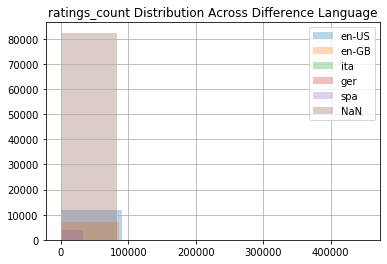

In [140]:
#Rating counts Distribution Across Difference Language
# books_df1[books_df1.language_code == 'eng'].groupby('ratings_count').size().plot(kind='bar', label='eng', alpha =0.3)
books_df1[books_df1.language_code == 'en-US'].ratings_count.hist(bins=5, label='en-US', alpha =0.3)
books_df1[books_df1.language_code == 'en-GB'].ratings_count.hist(bins=5, label='en-GB', alpha =0.3)
books_df1[books_df1.language_code == 'ita'].ratings_count.hist(bins=5, label='ita', alpha =0.3)
books_df1[books_df1.language_code == 'ger'].ratings_count.hist(bins=5, label='ger', alpha =0.3)
books_df1[books_df1.language_code == 'spa'].ratings_count.hist(bins=5, label='spa', alpha =0.3)
books_df1[books_df1.language_code.isnull()].ratings_count.hist(bins=5, label='NaN', alpha =0.3)
plt.legend()
plt.title('ratings_count Distribution Across Difference Language');

In [157]:
len(books_df1.text_reviews_count.unique()), books_df1.text_reviews_count.unique()

(1719, array([  15,   60,   23, ..., 4071, 2179, 1795]))

#### num_pages, is_ebook, rating counts and text review counts

In [160]:
len(books_df1.num_pages.unique()), books_df1.num_pages.unique()

(1156, array([ 400,  318,  320, ..., 1712, 1103, 1239]))

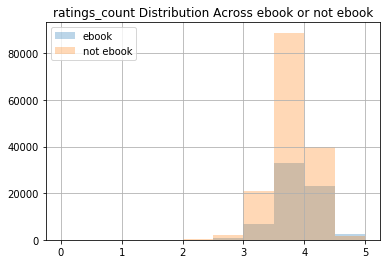

In [162]:
#Rating Distribution Across ebook or not ebook
books_df1[books_df1.is_ebook == 'true'].average_rating.hist(bins=10,label='ebook', alpha =0.3)
books_df1[books_df1.is_ebook == 'false'].average_rating.hist(bins=10, label='not ebook', alpha =0.3)
plt.legend()
plt.title('ratings_count Distribution Across ebook or not ebook');

In [166]:
books_df1.drop(['book_id', 'work_id','isbn','asin', 'country_code'], axis = 1, inplace=True)

### Merge reviews and book graph

In [41]:
book_review = pd.merge(reviews_df1, books_df, on=['book_id'])

In [42]:
len(book_review)

1791519

In [45]:
book_review.columns

Index(['review_id', 'user_id', 'book_id', 'rating', 'review_text', 'timestamp',
       'n_votes', 'n_comments', 'work_id', 'isbn', 'asin', 'title',
       'description', 'num_pages', 'is_ebook', 'link', 'country_code',
       'language_code', 'average_rating', 'ratings_count',
       'text_reviews_count', 'author_id', 'publisher', 'publication_year',
       'genre', 'similar_books'],
      dtype='object')

In [46]:
book_review.head()

,review_id,user_id,book_id,rating,review_text,timestamp,n_votes,n_comments,work_id,isbn,...,country_code,language_code,average_rating,ratings_count,text_reviews_count,author_id,publisher,publication_year,genre,similar_books
0,5e212a62bced17b4dbe41150e5bb9037,8842281e1d1347389f2ab93d60773d4d,6392944,3,I haven't read a fun mystery book in a while a...,Mon Jul 24 02:48:17 -0700 2017,6,0,625995,,...,US,eng,3.80,675,42,"[{'author_id': '123715', 'role': ''}]",,,"[{'count': '1572', 'name': 'mystery'}, {'count...","[280990, 1332179, 2008927, 383223, 192888, 311..."
1,ee9cf5e49795718b9bb086c1cde23116,24d87e891f6f60ae101c1de158cbe672,6392944,4,"A fun, fast read! I just adore reading books w...",Fri Jun 24 10:34:25 -0700 2011,0,0,625995,,...,US,eng,3.80,675,42,"[{'author_id': '123715', 'role': ''}]",,,"[{'count': '1572', 'name': 'mystery'}, {'count...","[280990, 1332179, 2008927, 383223, 192888, 311..."
2,b5a6af59482018d0814c373723080adb,d083ade0fb4502508b1f3ce59bf1c7db,6392944,4,"Full of twists and turns, way better than the ...",Wed Aug 27 11:42:41 -0700 2014,0,0,625995,,...,US,eng,3.80,675,42,"[{'author_id': '123715', 'role': ''}]",,,"[{'count': '1572', 'name': 'mystery'}, {'count...","[280990, 1332179, 2008927, 383223, 192888, 311..."
3,4339e08a4eefd80a4e38fb86d50a1ad8,74cd9e03b81085c69ae2dc9fcce17f48,6392944,4,The Murder on the Links is Agatha Christie's s...,Tue Jan 27 07:05:17 -0800 2015,1,0,625995,,...,US,eng,3.80,675,42,"[{'author_id': '123715', 'role': ''}]",,,"[{'count': '1572', 'name': 'mystery'}, {'count...","[280990, 1332179, 2008927, 383223, 192888, 311..."
4,994211c385e1989f034944dc1e113acb,b6c9716c71c8bfb757a3aee18c1d0be7,6392944,3,I enjoyed this novel. It is the epitome of a m...,Sat Apr 01 13:45:00 -0700 2017,0,0,625995,,...,US,eng,3.80,675,42,"[{'author_id': '123715', 'role': ''}]",,,"[{'count': '1572', 'name': 'mystery'}, {'count...","[280990, 1332179, 2008927, 383223, 192888, 311..."


### plot different genre rating distribution

In [140]:
def mask(df, key, function):
    return df[function(df[key])]

    """
    Returns a filtered dataframe, by applying function to key
    """

def flatten_cols(df):
    df.columns = [' '.join(col).strip() for col in df.columns.values]
    return df

pd.DataFrame.mask = mask
pd.DataFrame.flatten_cols = flatten_cols

def filtered_hist(field, label, filter):
    """
    Creates a layered chart of histograms.
    The first layer (light gray) contains the histogram of the full data, and the
    second contains the histogram of the filtered data.
    Args:
    field: the field for which to generate the histogram.
    label: String label of the histogram.
    filter: an alt.Selection object to be used to filter the data.
    """
    base = alt.Chart().mark_bar().encode(
      x=alt.X(field, bin=alt.Bin(maxbins=10), title=label),
      y="count()",
      ).properties(
      width=300,
      )
    return alt.layer(base.transform_filter(filter),
                       base.encode(color=alt.value('lightgray'), opacity=alt.value(.7)),).resolve_scale(y='independent')

In [141]:
import altair as alt
books_ratings = books_df1.merge(reviews_df1
                               .groupby('book_id', as_index=False)
                                .agg({'rating': ['count', 'mean']})
                                .flatten_cols(),
                                on='book_id')

language_filter = alt.selection_multi(fields=['language_code'])
language_chart = alt.Chart().mark_bar().encode(
    x="count()",
    y=alt.Y('language_code'),
    color=alt.condition(
        language_filter,
        alt.Color("language:N"),
        alt.value('lightgray'))
).properties(height=300, selection=language_filter)

In [142]:
alt.hconcat(
    filtered_hist('rating count', '# ratings / book', language_filter),
    filtered_hist('rating mean', 'mean movie rating', language_filter),
    language_chart,
    data=books_ratings)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.HConcatChart(...)

In [ ]:
# fea_list = [book_ids, work_ids, isbn, asin, titles, description, num_pages, is_ebook, ratings_count, 
#             text_reviews_count, author_id, publisher, publication_year, genre, similar_books,
#             links, country_code, language_code,average_rating]